<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#2a6199; overflow:hidden"><b> Alzheimer's Analysis and Prediction </b></div>

In [ ]:
!kaggle datasets download -d rabieelkharoua/alzheimers-disease-dataset
!unzip alzheimers-disease-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/268k [00:00<?, ?B/s]
100% 268k/268k [00:00<00:00, 49.5MB/s]
Archive:  alzheimers-disease-dataset.zip
  inflating: alzheimers_disease_data.csv  


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>1. Installing Required Libraries</b></div>

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', palette='muted', style='darkgrid')

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>2. Reading and Understanding our Data</b></div>

In [ ]:
df = pd.read_csv('alzheimers_disease_data.csv')
df.head().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [ ]:
# Count duplicated rows in the DataFrame
sum(df.duplicated())

0

In [ ]:
# Count occurrences of each unique value in the 'DoctorInCharge'
df.DoctorInCharge.value_counts()

,count
DoctorInCharge,
XXXConfid,2149


In [ ]:
# Drop unnecessary columns from the DataFrame
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

<div style="padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #888888;">
    <h1 style="font-size: 24px; font-family: 'Arial'; color: #c77220"><b>Initial Data Exploration Summary</b></h1>
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        <li>The dataset contains a total of <strong>2,149 observations</strong>.</li>
        <li>All values in the dataset are <strong>non-null</strong> and <strong>numerical</strong>.</li>
        <li>There are <strong>no duplicate</strong> records.</li>
        <li>After removing the `DoctorInCharge` and `PatientID` columns, the dataset consists of <strong>33 features</strong>.</li>
    </ul>
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3. Data Visualization</b></div>

In [ ]:
# Identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

<a id='cat'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.1. Distribution of Categorical Features  </b></div>

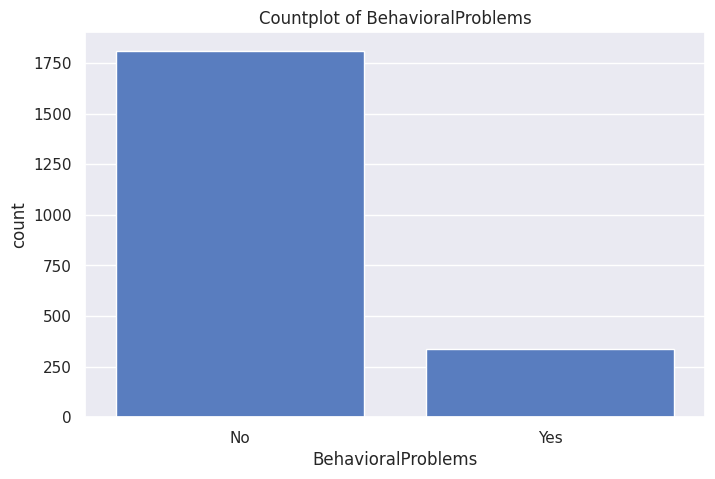

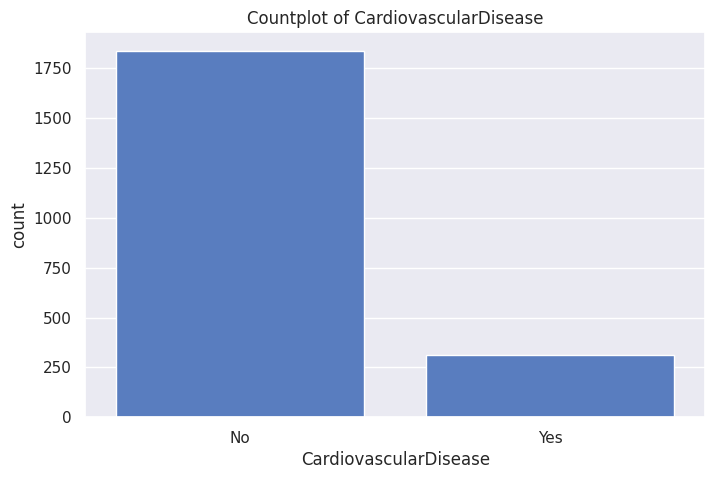

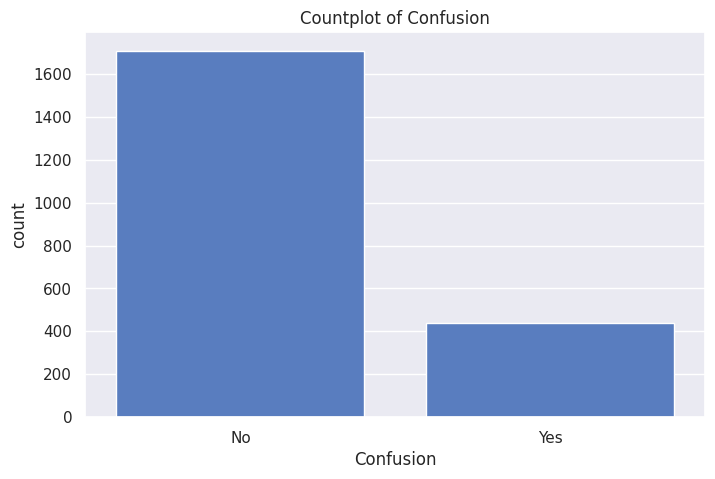

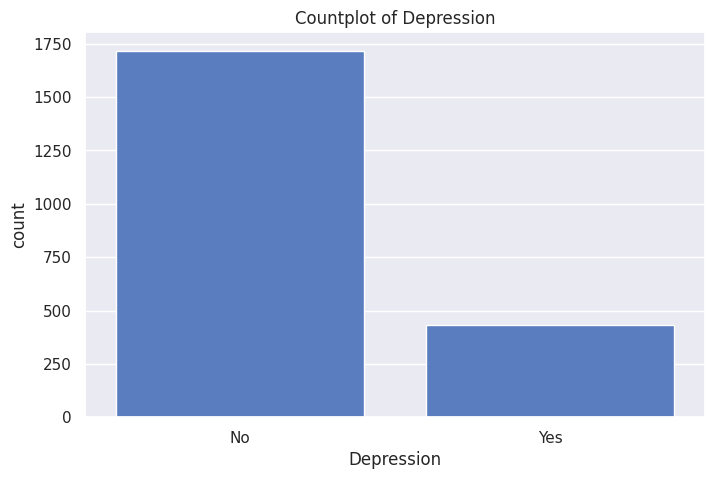

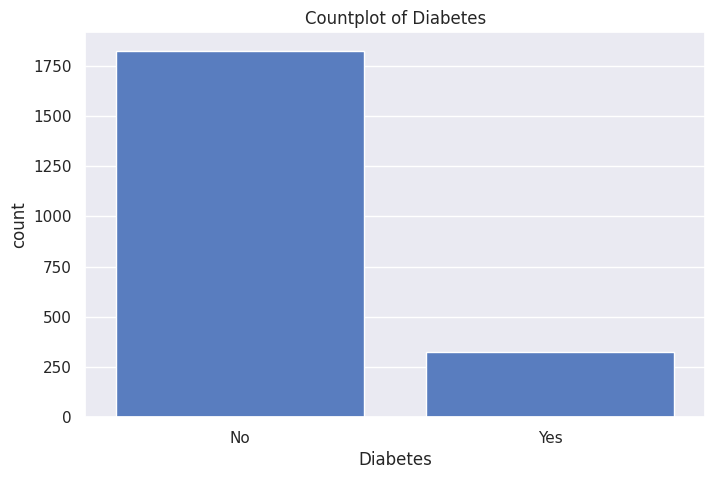

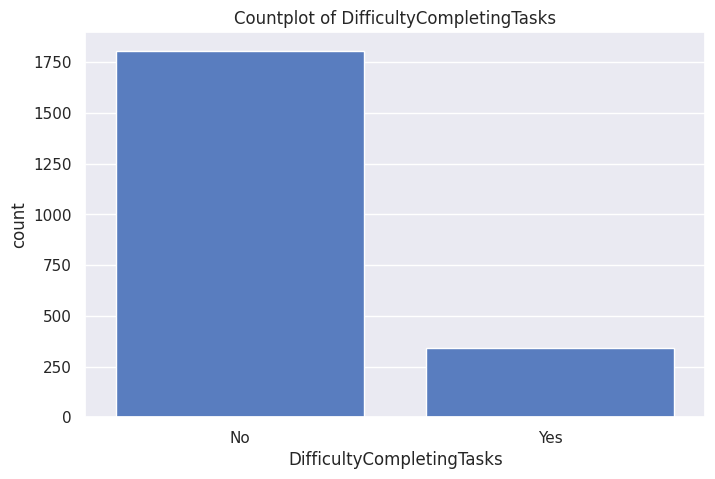

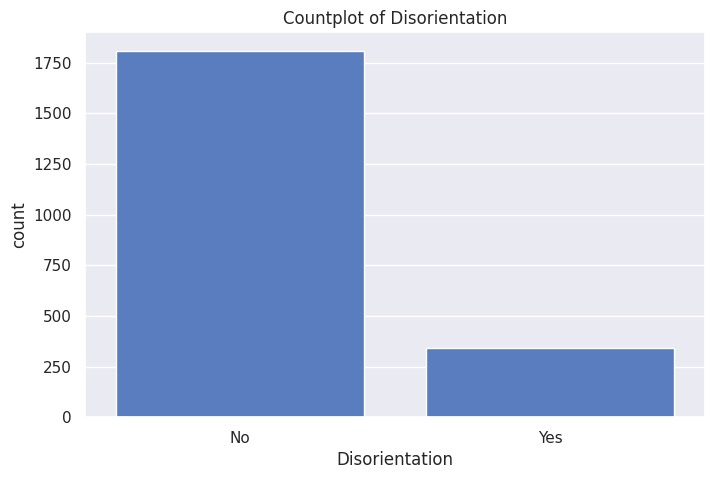

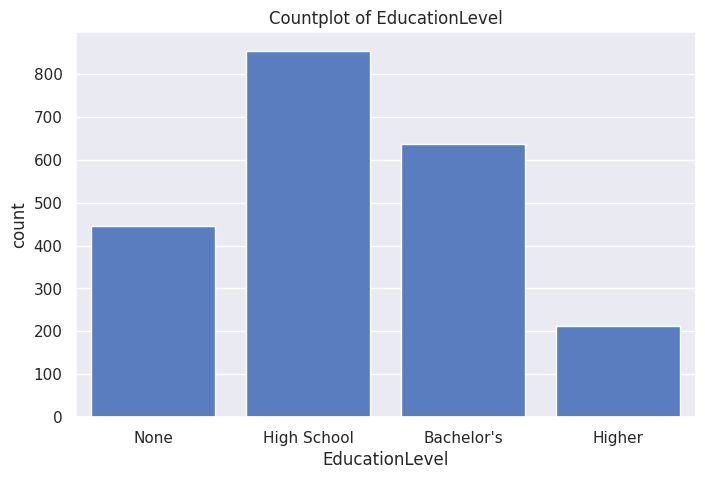

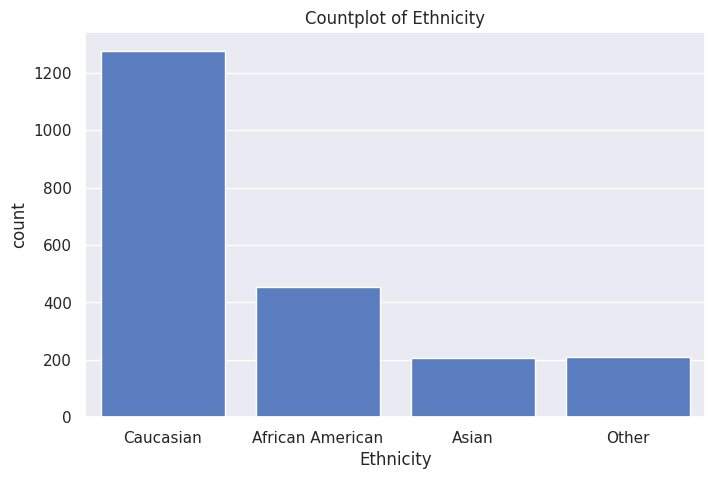

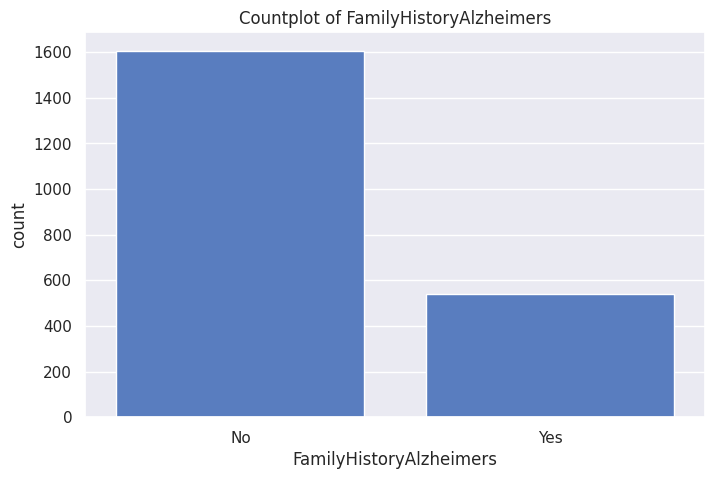

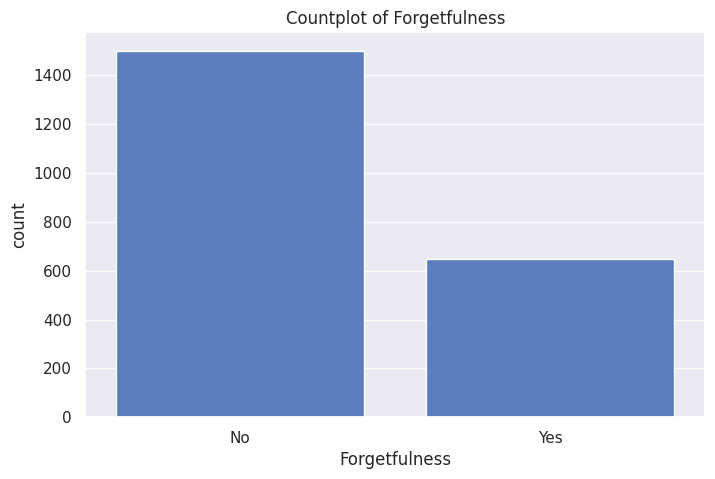

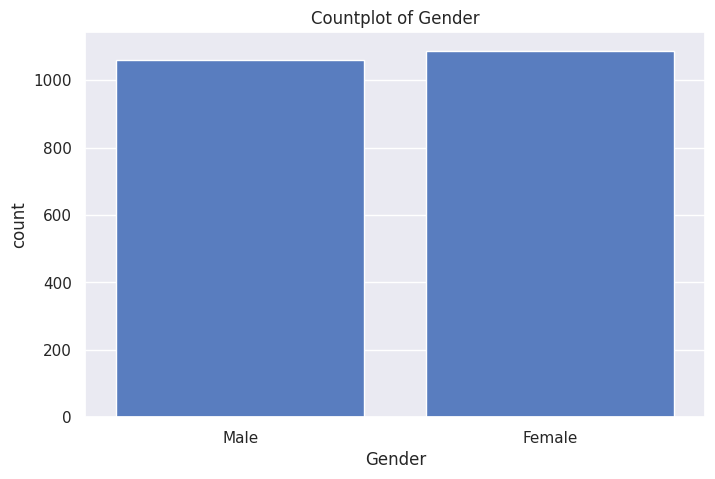

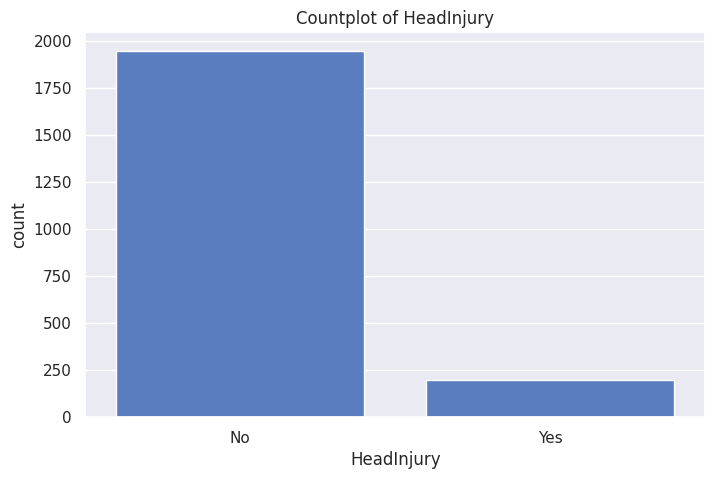

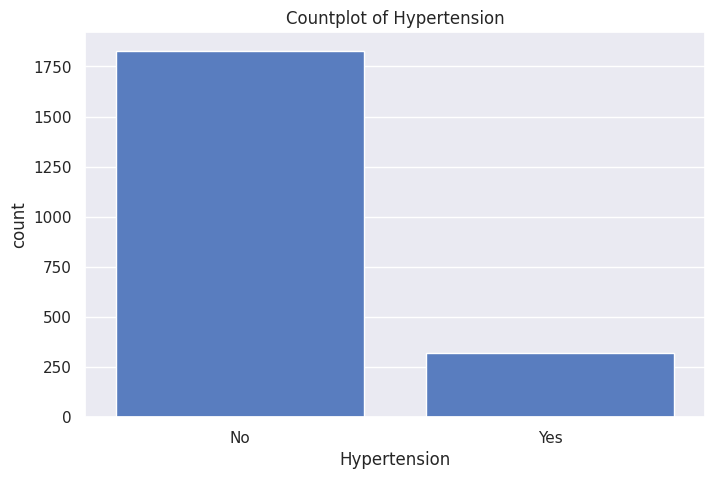

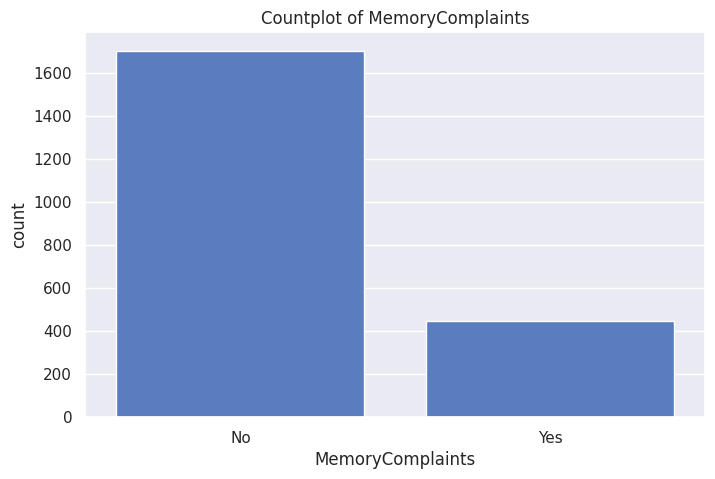

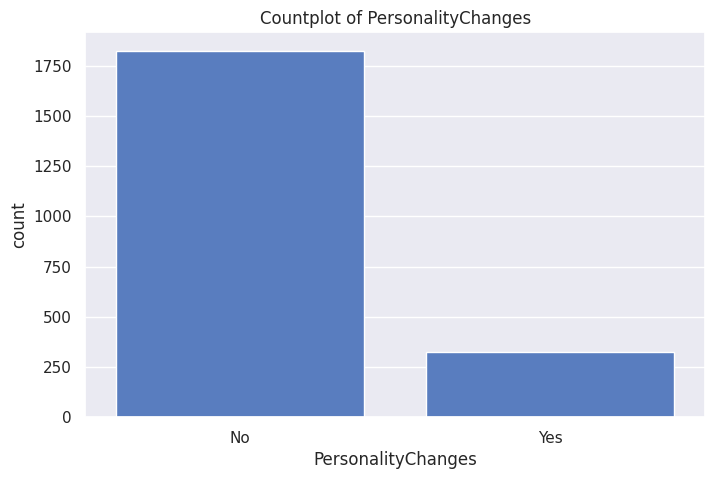

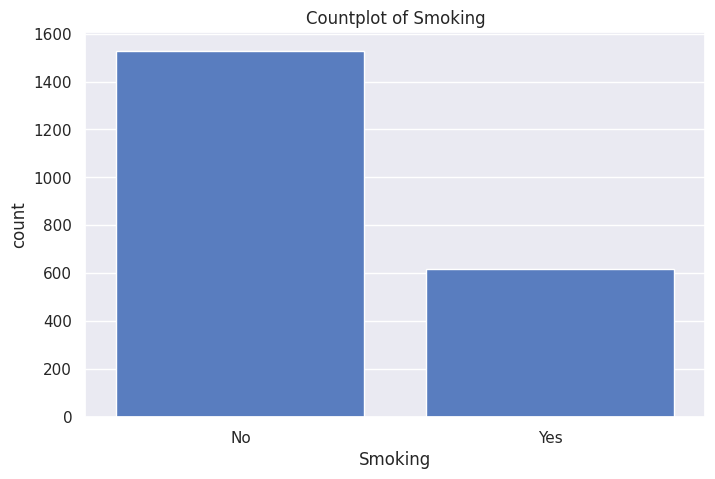

In [ ]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')

    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

    plt.show()

<div style="padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #888888;">
    <h1 style="font-size: 24px; font-family: 'Arial'; color: #c77220"><b>Observations from Visualization of Categorical Features</b></h1>
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        <li>Overall, the dataset predominantly consists of individuals <strong>without disease or health problems</strong>.</li>
        <li><strong>Caucasian</strong>. The most represented demographic is</li>
        <li><strong>High school</strong> graduates constitute the largest educational group, closely followed by individuals with a <strong>bachelor's</strong> degree.</li>
        <li>Notably, both <strong>females</strong> and <strong>males</strong> are equally represented across the dataset.</li>
    </ul>
</div>

<a id='num'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.2. Distribution of Numerical Features  </b></div>

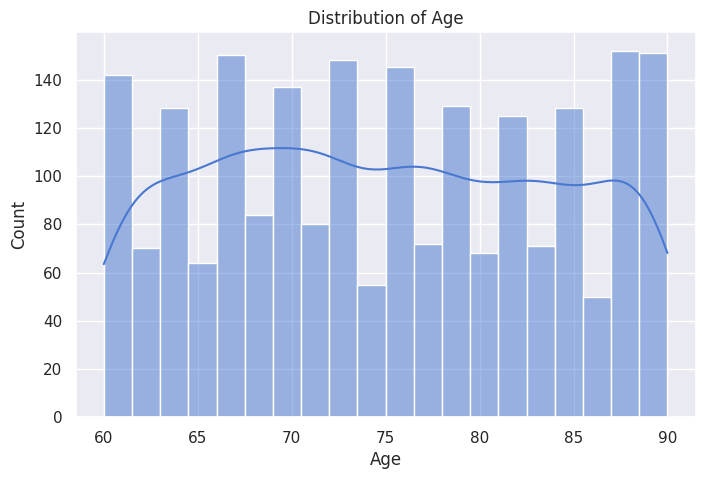

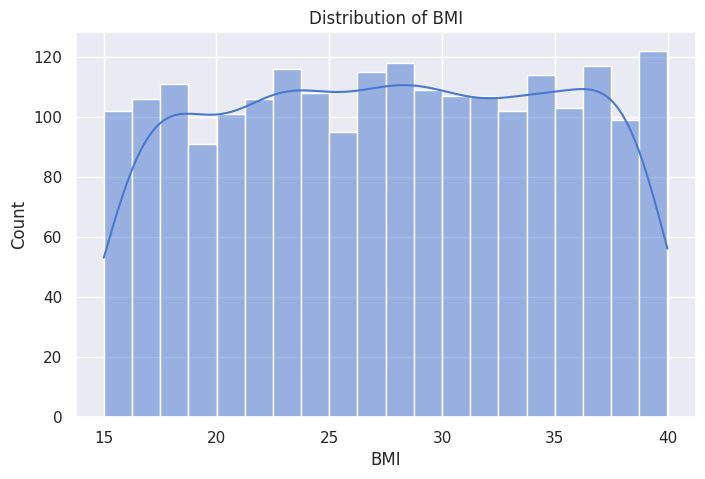

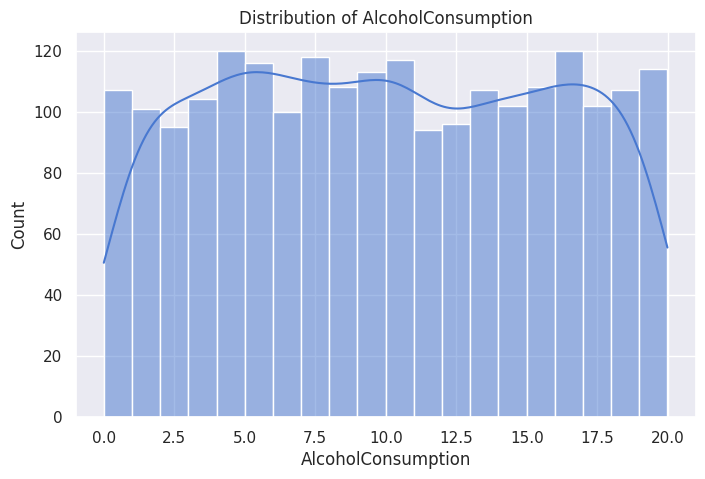

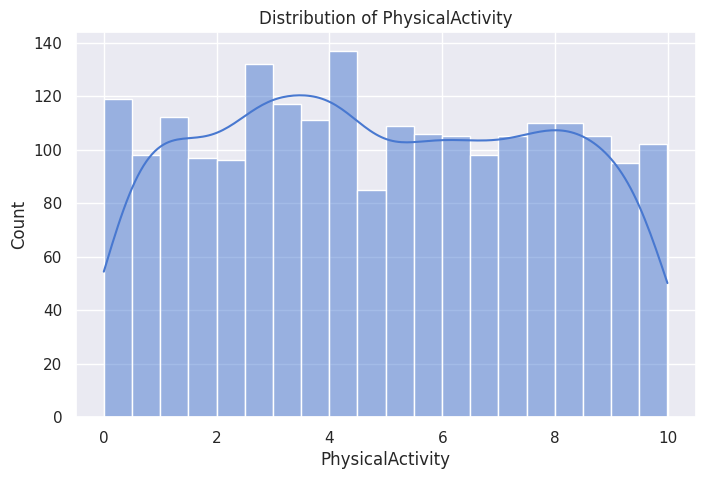

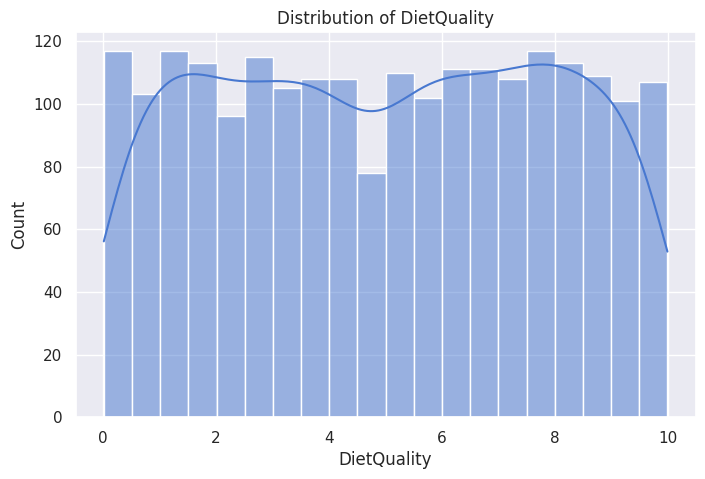

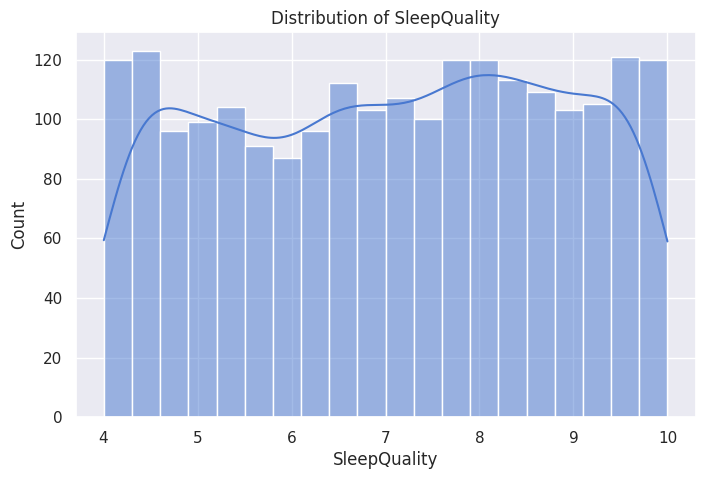

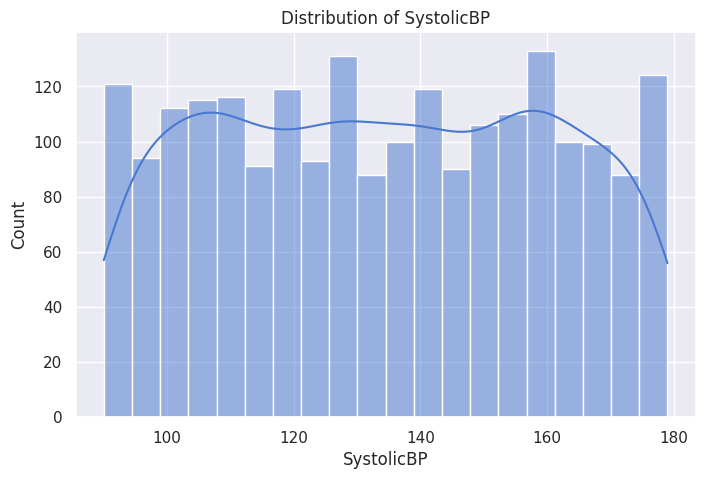

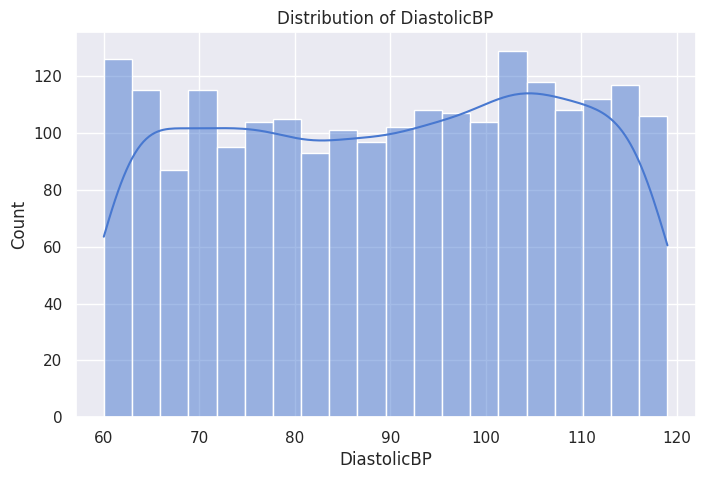

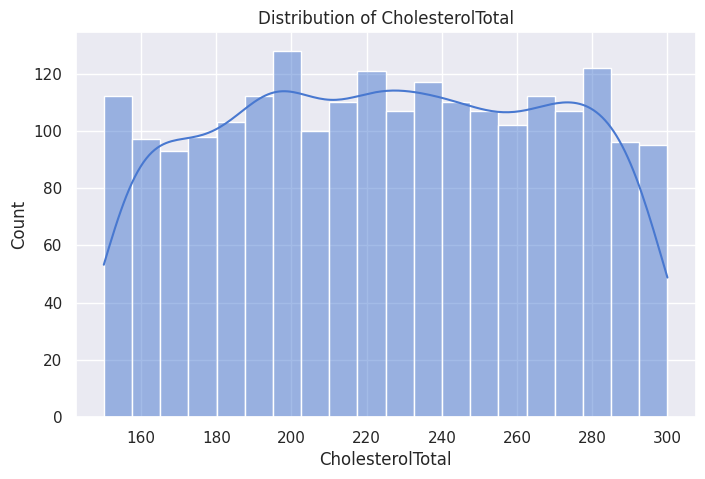

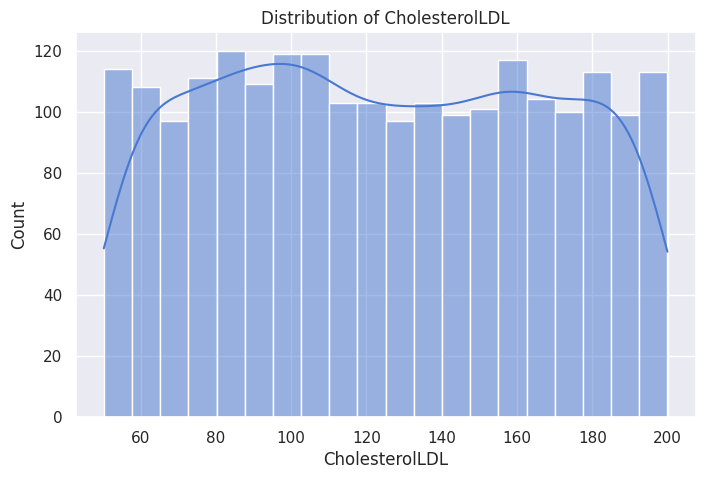

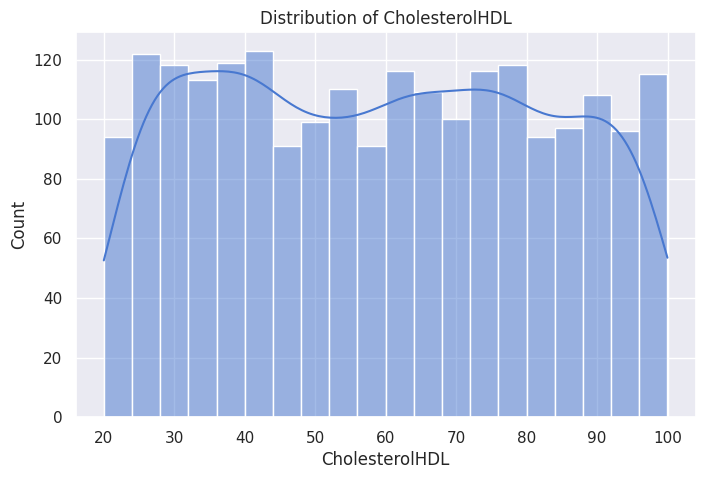

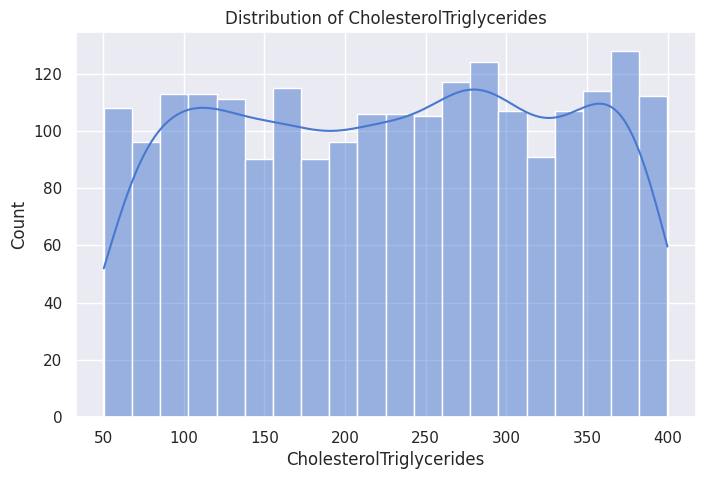

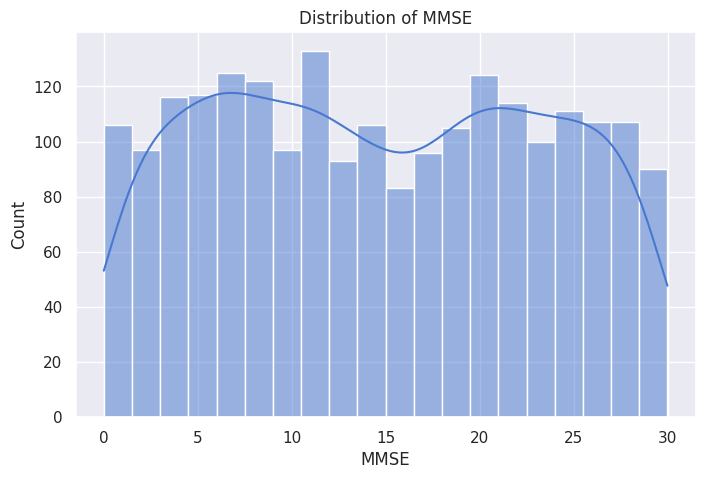

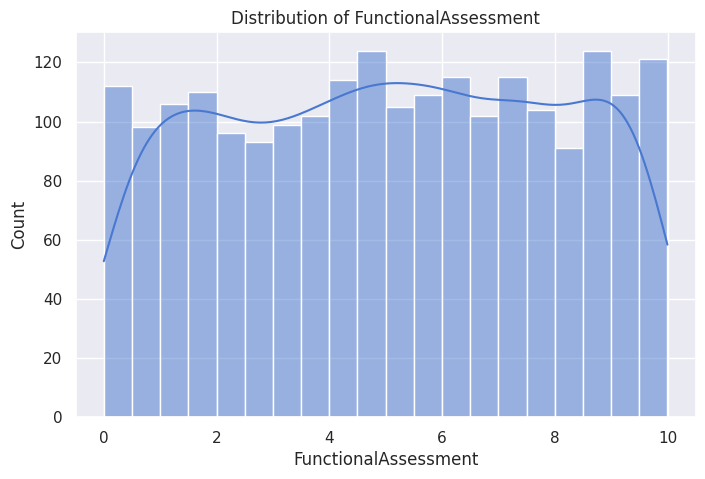

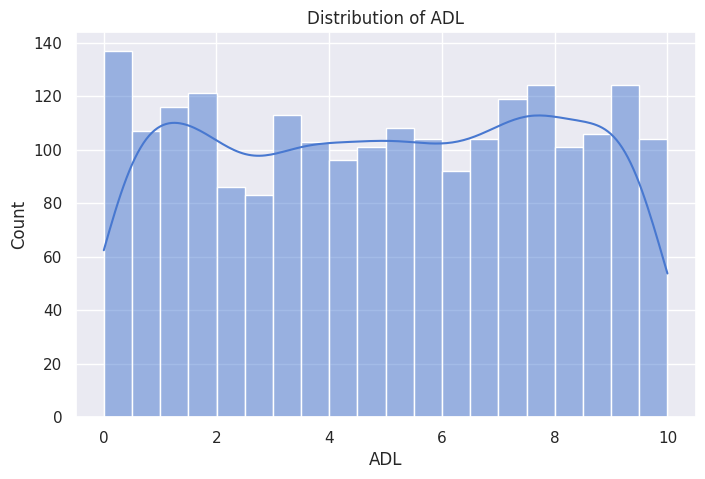

In [ ]:
# Plot histogram for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

<div style="padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #888888;">
    <h1 style="font-size: 24px; font-family: 'Arial'; color: #c77220"><b>Observations from Visualization of Numerical Features</b></h1>
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        <li>Most of the columns show a <strong>fairly uniform</strong> distribution. </li>
        <li>The `MMSE` (Mini-Mental State Examination) scores appear to follow a <strong>bimodal</strong> distribution, indicating two distinct groups within the data.</li>
    </ul>
</div>

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.3. Exploring Correlations  </b></div>

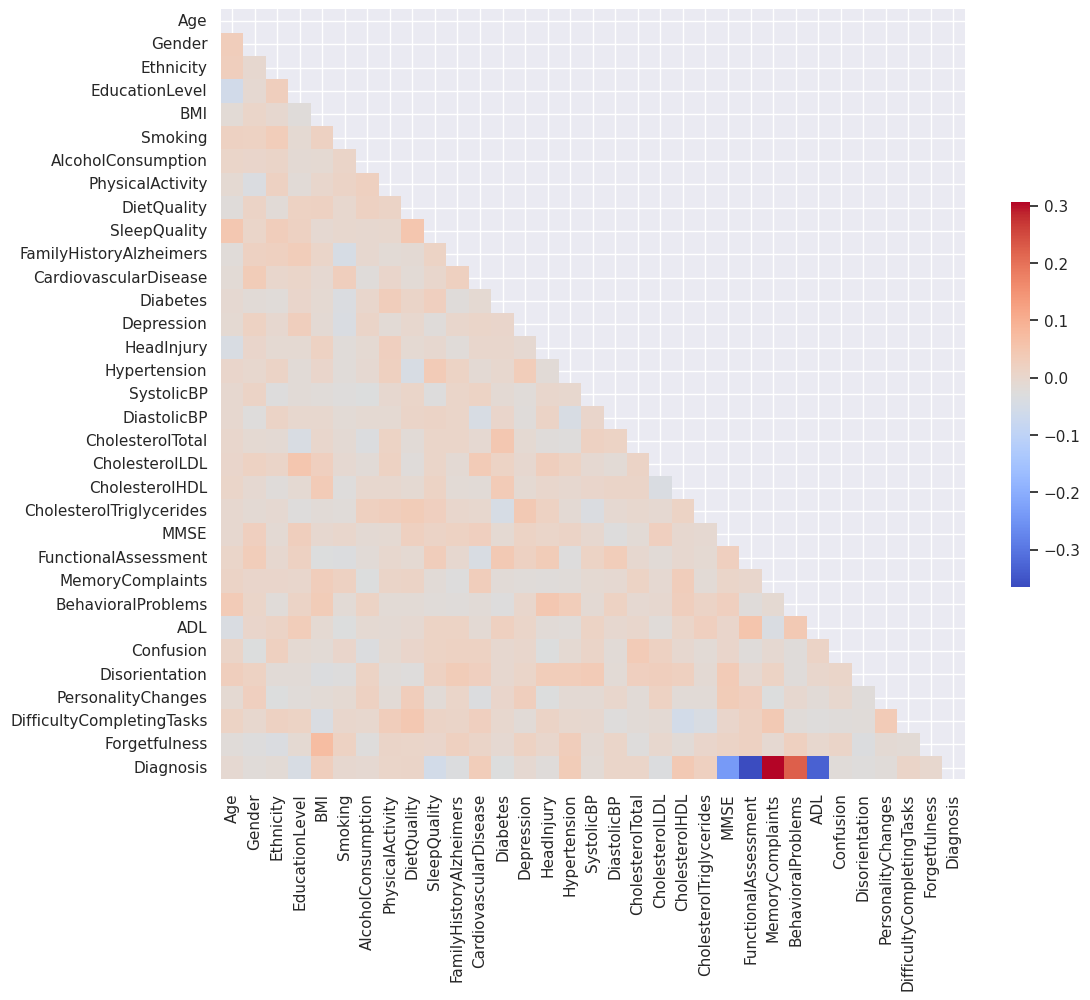

In [ ]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

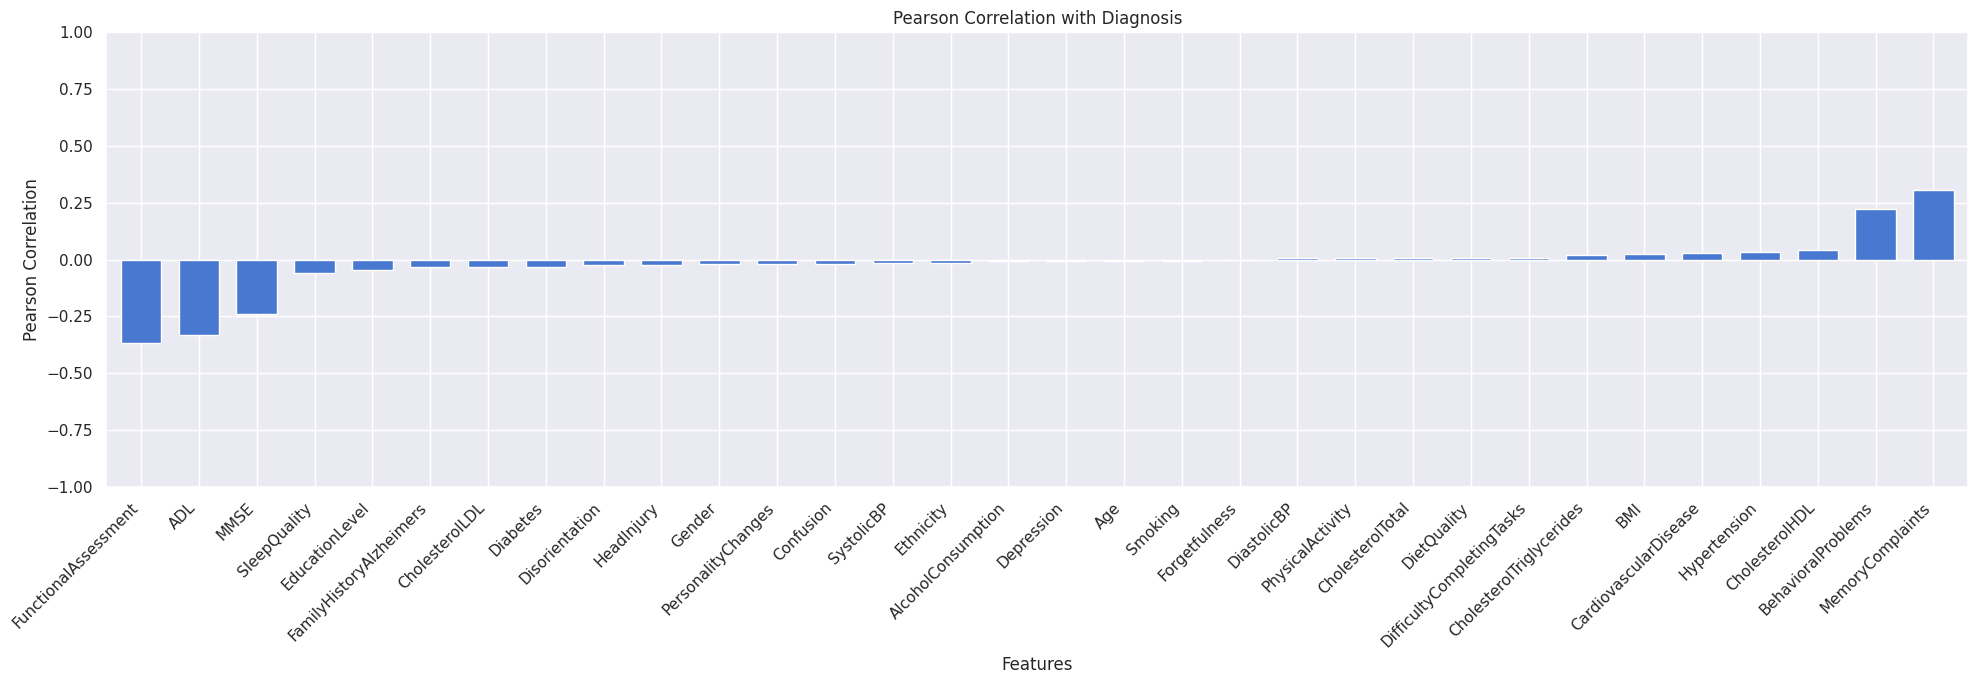

In [ ]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features',
       title='Pearson Correlation with Diagnosis')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

And now let's plot the distribution of the most correlated columns across different 'Diagnosis' categories.

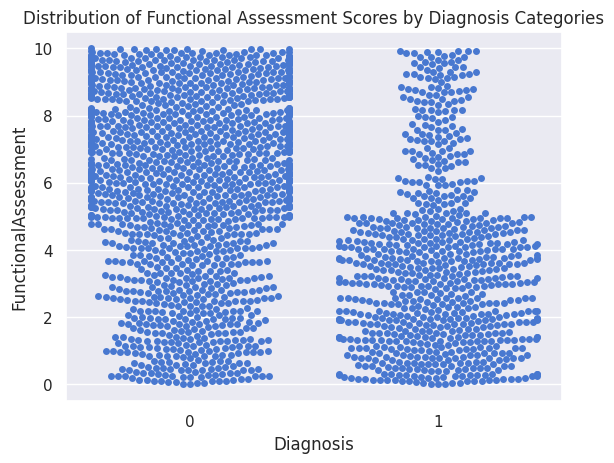

In [ ]:
sns.swarmplot(data=df, y='FunctionalAssessment', x='Diagnosis')
plt.title(f'Distribution of Functional Assessment Scores by Diagnosis Categories')
plt.show()

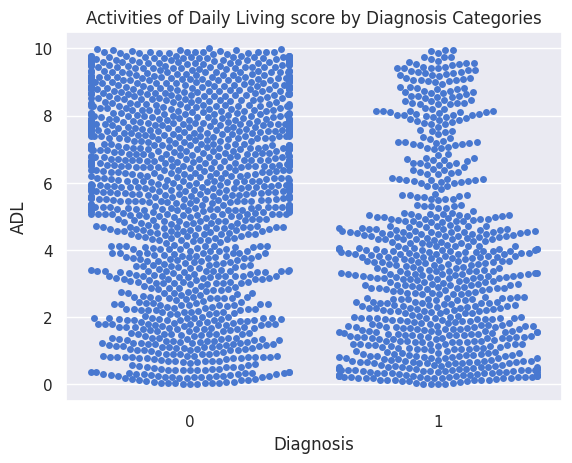

In [ ]:
sns.swarmplot(data=df, y='ADL', x='Diagnosis')
plt.title(f'Activities of Daily Living score by Diagnosis Categories')
plt.show()

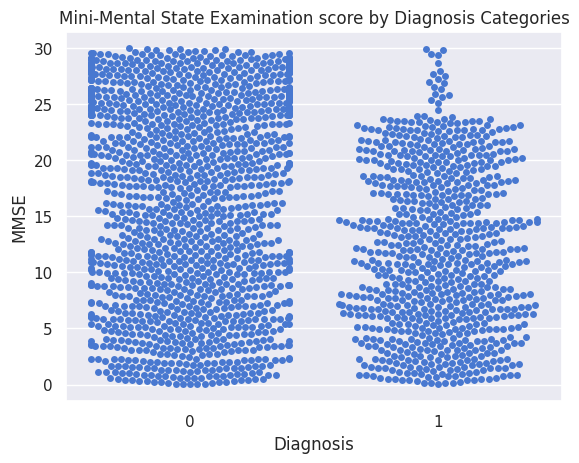

In [ ]:
sns.swarmplot(data=df, y='MMSE', x='Diagnosis')
plt.title(f'Mini-Mental State Examination score by Diagnosis Categories')
plt.show()

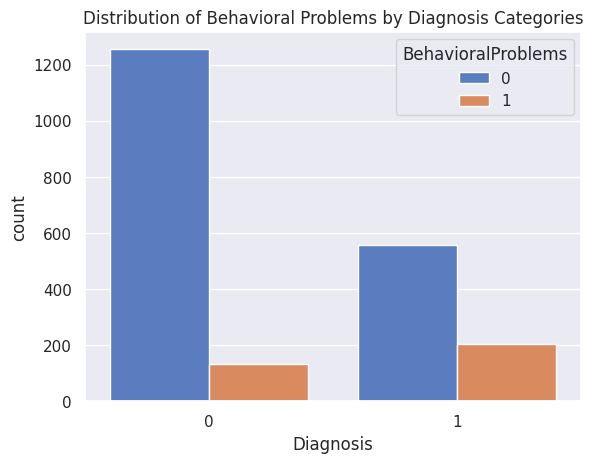

In [ ]:
sns.countplot(data=df, x='Diagnosis', hue='BehavioralProblems')
plt.title(f'Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()

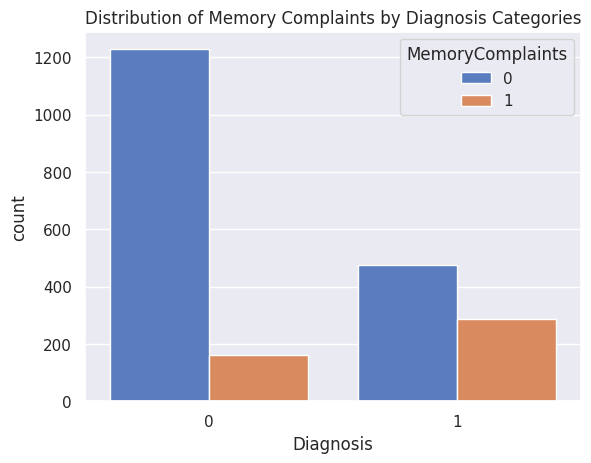

In [ ]:
sns.countplot(data=df, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribution of Memory Complaints by Diagnosis Categories')
plt.show()

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.4. Distribution of a Target Variable  </b></div>

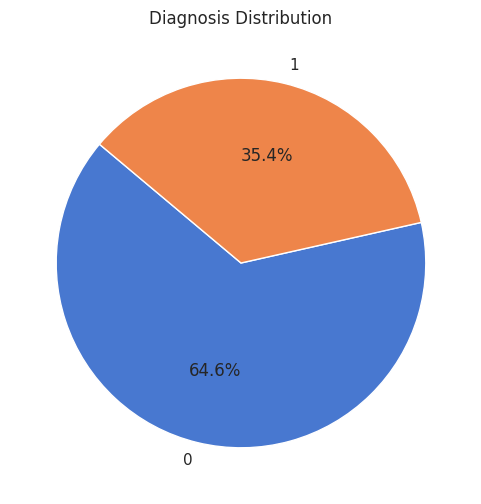

In [ ]:
# Define the Response categories and count occurences
categories = [0, 1]
counts = df.Diagnosis.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

<div style="padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #888888;">
    <h1 style="font-size: 24px; font-family: 'Arial'; color: #c77220"><b>Observation from the Target Distribution</b></h1>
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        <li>Our target variable is <strong>moderately imbalanced</strong>, with 65% of instances being 0 and 35% being 1.</li>
    </ul>
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 4. Data Pre-Processing</b></div>

In [ ]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1


In [ ]:
#unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Age':
[73 89 74 86 68 75 72 87 78 84 64 69 63 65 82 77 71 83 79 67 66 70 85 60
 88 62 81 61 80 90 76]

Unique values in column 'Gender':
[0 1]

Unique values in column 'Ethnicity':
[0 3 1 2]

Unique values in column 'EducationLevel':
[2 0 1 3]

Unique values in column 'BMI':
[22.92774923 26.82768119 17.79588244 ... 15.47647896 15.29991122
 33.28973831]

Unique values in column 'Smoking':
[0 1]

Unique values in column 'AlcoholConsumption':
[13.29721773  4.54252382 19.55508453 ...  4.59467018  8.67450518
  7.89070315]

Unique values in column 'PhysicalActivity':
[6.32711247 7.61988454 7.84498779 ... 9.88600229 6.35428175 6.57099338]

Unique values in column 'DietQuality':
[1.34721431 0.51876714 1.82633466 ... 8.12002455 1.26342749 7.94140388]

Unique values in column 'SleepQuality':
[9.02567867 7.15129274 9.67357416 ... 5.76946355 8.32287396 9.87871052]

Unique values in column 'FamilyHistoryAlzheimers':
[0 1]

Unique values in column 'CardiovascularDisease':
[0

In [ ]:
columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

#normalize the columns
min_max_scaler = MinMaxScaler()
df[columns] = min_max_scaler.fit_transform(df[columns])

#standardize the columns
standard_scaler = StandardScaler()
df[columns] = standard_scaler.fit_transform(df[columns])

In [ ]:
# prompt: suppose I give a new row of data. how would you do MinMaxScaler() and StandardScaler()

# Assuming 'new_row_data' is a dictionary or a list representing the new row
# Example:
new_row_data = {'Age': 65, 'BMI': 28, 'AlcoholConsumption': 2, 'PhysicalActivity': 3, 'DietQuality': 4,
                'SleepQuality': 7, 'SystolicBP': 120, 'DiastolicBP': 80, 'CholesterolTotal': 200,
                'CholesterolLDL': 100, 'CholesterolHDL': 60, 'CholesterolTriglycerides': 150, 'MMSE': 25,
                'FunctionalAssessment': 80, 'ADL': 5}


# Create a DataFrame from the new row data
new_row_df = pd.DataFrame([new_row_data])


# Select the columns for scaling (same columns as used in the original code)
columns_to_scale = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
                    'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

# Apply MinMaxScaler to the new row
new_row_df[columns_to_scale] = min_max_scaler.transform(new_row_df[columns_to_scale])

# Apply StandardScaler to the new row
new_row_df[columns_to_scale] = standard_scaler.transform(new_row_df[columns_to_scale])


new_row_df

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
0,-1.102431,0.047715,-1.396568,-0.672216,-0.341475,-0.028971,-0.549844,-0.559905,-0.592432,-0.561299,0.02319,-0.767744,1.189722,25.905298,0.005779


In [ ]:
import pickle

# Save the MinMaxScaler
with open('min_max_scaler_alz.sav', 'wb') as f:
    pickle.dump(min_max_scaler, f)

# Save the StandardScaler
with open('standard_scaler_alz.sav', 'wb') as f:
    pickle.dump(standard_scaler, f)

In [ ]:
from google.colab import files
files.download('min_max_scaler_alz.sav')
files.download('standard_scaler_alz.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,0,0,2,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,0,0,1,1,0,0,0.298159,-1.014750,0.403677,-1.572661,-1.114429,-0.648199,0.779037,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,1.567757,0,0,0,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,0,0,0,0,0,0,-0.742572,-1.469595,0.140248,1.593119,0.845730,0.650721,0.680297,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,-0.212368,0,3,1,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,1,0,0,0,0,0,-1.359301,1.486898,1.386812,0.668569,0.445615,-1.418585,-0.859222,0.281813,0,0,0.724491,0,1,0,1,0,0
3,-0.101111,1,0,1,0.851625,1,0.376930,1.227995,0.839804,0.760833,0,0,0,0,0,0,-0.626935,1.430043,-1.542715,-1.360103,0.388780,0.483468,-0.088723,1.343346,0,1,0.508044,0,0,0,0,0,0
4,1.567757,0,0,0,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,0,0,0,0,0,0,-1.552029,1.543754,0.291653,-0.725756,-0.111924,0.617060,-0.143712,0.333665,0,0,-1.684679,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,-1.547463,0,0,1,1.589030,0,-1.472807,-0.304649,0.537127,0.274767,0,0,0,0,0,0,-0.472753,0.634063,1.299701,-0.679609,0.063957,0.061185,-1.574000,-1.674022,0,0,-0.166194,1,0,0,0,0,1
2145,0.010147,0,0,2,-1.357833,0,1.516149,-1.246106,-0.718090,0.853112,0,0,0,0,0,0,0.683615,0.918342,-0.912555,-0.667149,1.477761,1.370158,-0.963527,1.247350,0,1,1.431627,0,0,0,0,0,1
2146,0.232663,0,0,1,-1.687864,0,-0.945836,1.738405,1.075131,-0.726886,0,0,0,0,0,0,-0.742572,1.600609,0.278072,0.736484,1.738352,0.652402,0.261971,-1.074634,0,0,0.018099,0,0,0,0,0,1
2147,0.343921,1,3,1,-1.712334,0,-0.237109,0.502036,-1.282402,0.721313,0,1,0,0,0,0,-1.205119,0.349785,0.399688,-1.657260,0.943104,-0.814293,-1.245437,0.032446,0,0,-0.406078,0,0,0,0,1,1


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 5. Modelling</b></div>

In [ ]:
#split data into features and target
X = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

#define hyperparameter grids for each model
param_grids = {
    'Decision Tree': {'max_depth': [3, 5, 7, 12, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 12, None]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

#instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

# #fit models using GridSearchCV for hyperparameter tuning
# for name, model in models.items():
#     grid_search = GridSearchCV(model, param_grids[name], cv = 5, scoring = 'f1')
#     grid_search.fit(X_train, y_train)
#     best_model = grid_search.best_estimator_
#     y_pred = best_model.predict(X_test)
#     report = classification_report(y_test, y_pred)
#     print(f'{name} Classification Report:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

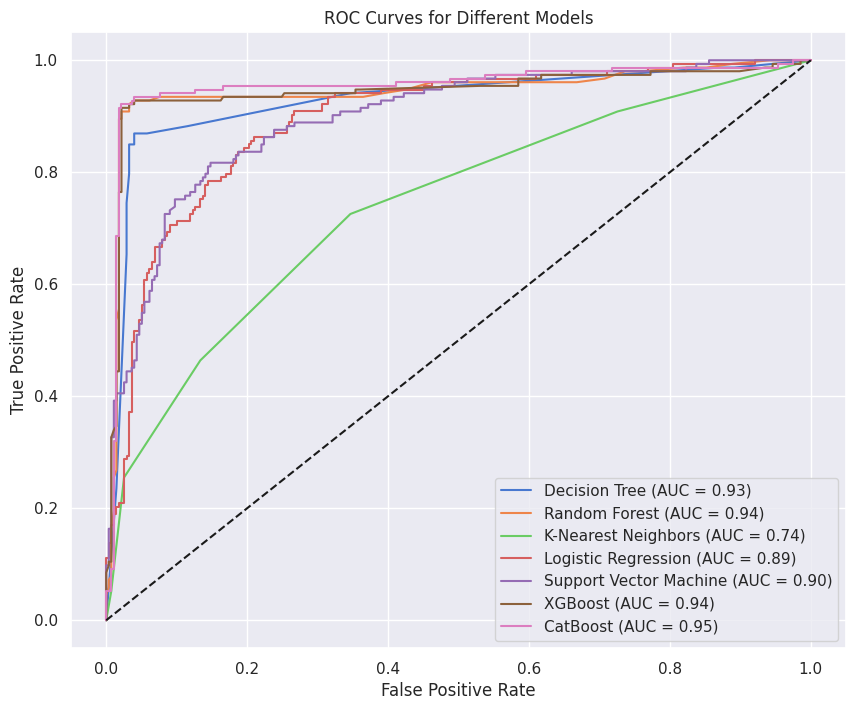

,Model,Precision,Recall,F1-Score,AUC
6,CatBoost,0.959184,0.921569,0.940000,0.954201
1,Random Forest,0.962406,0.836601,0.895105,0.944739
5,XGBoost,0.952381,0.915033,0.933333,0.943937
0,Decision Tree,0.923611,0.869281,0.895623,0.927597
4,Support Vector Machine,0.820312,0.686275,0.747331,0.895991
3,Logistic Regression,0.789855,0.712418,0.749141,0.893679
2,K-Nearest Neighbors,0.657407,0.464052,0.544061,0.740084


In [ ]:
# prompt: fit models using GridSearchCV for hyperparameter tuning
# and save necessary variables for "compare all models and sort all models by score in pd dataframe and Generate one single graph having all model roc curves wwith legends in the side"

from sklearn.metrics import roc_curve, auc

model_results = []
plt.figure(figsize=(10, 8))

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_results.append({
        'Model': name,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'AUC': roc_auc
    })


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()


df_results = pd.DataFrame(model_results)
df_results = df_results.sort_values('AUC', ascending=False)
df_results

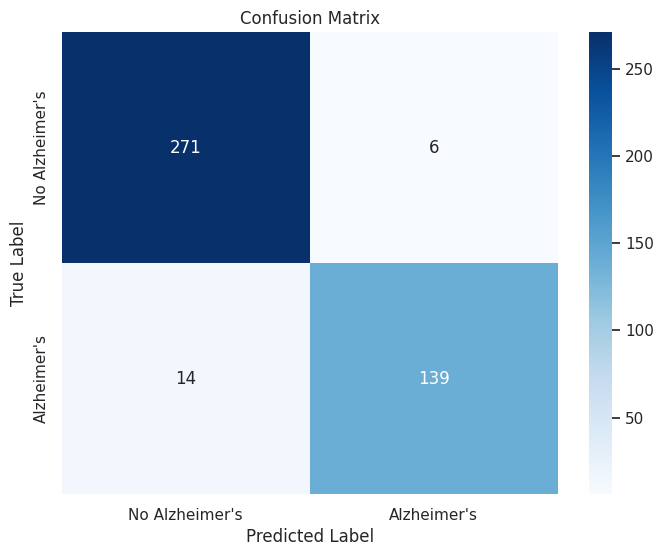

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'best_model' is your trained model
best_model = models['CatBoost']
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Alzheimer\'s', 'Alzheimer\'s'],
            yticklabels=['No Alzheimer\'s', 'Alzheimer\'s'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# prompt: save and dump catboost in a .sav file and download

from joblib import dump, load

# Assuming 'best_model' is your trained CatBoostClassifier
# Replace with your actual best model
best_model = models['CatBoost']
best_model.fit(X_train, y_train)

# Save the model to a .sav file
dump(best_model, 'catboost_model.sav')

# Download the saved model file
from google.colab import files
files.download('catboost_model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # prompt: compare all models and sort all models by score in pd dataframe and Generate one single graph having all model roc curves

# from sklearn.metrics import roc_curve, auc

# model_results = []
# plt.figure(figsize=(10, 8))

# for name, model in models.items():
#     grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1')
#     grid_search.fit(X_train, y_train)
#     best_model = grid_search.best_estimator_
#     y_pred_proba = best_model.predict_proba(X_test)[:, 1]
#     fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#     roc_auc = auc(fpr, tpr)

#     plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

#     y_pred = best_model.predict(X_test)
#     report = classification_report(y_test, y_pred, output_dict=True)
#     model_results.append({
#         'Model': name,
#         'Precision': report['1']['precision'],
#         'Recall': report['1']['recall'],
#         'F1-Score': report['1']['f1-score'],
#         'AUC': roc_auc
#     })


# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves for Different Models')
# plt.legend(loc='lower right')
# plt.show()


# df_results = pd.DataFrame(model_results)
# df_results = df_results.sort_values('AUC', ascending=False)
# df_results


In [ ]:
# prompt: I loaded it .sav in my web app. What datas should I collect and how should I tranform them before .predict()? I don't have access to this particular notebook. Write python code?

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def preprocess_data(input_data):
  """
  Preprocesses input data for Alzheimer's disease prediction.

  Args:
    input_data: A dictionary or pandas DataFrame containing the input features.

  Returns:
    A pandas DataFrame with preprocessed features ready for prediction.
  """

  df = pd.DataFrame(input_data)  # Convert input to DataFrame if needed

  # Identify numerical columns that were scaled during training.
  columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

  # Apply MinMax scaling
  min_max_scaler = MinMaxScaler()
  df[columns] = min_max_scaler.fit_transform(df[columns])

  # Apply Standard scaling
  standard_scaler = StandardScaler()
  df[columns] = standard_scaler.fit_transform(df[columns])

  # Make sure the order of columns matches the training data
  # If you have missing columns, add them with default values (e.g., 0)
  # Ensure that the columns are in the same order used during training.

  # You can either ensure that your input data has the exact same columns
  # as your training data or you can handle missing columns in your preprocessing.


  return df


# Example of how to use the function:
# input_data = {
#     'Age': [65],
#     'BMI': [25],
#     'AlcoholConsumption': [1],
#     'PhysicalActivity': [3],
#     # ... add all other features you used during training
# }
# preprocessed_df = preprocess_data(input_data)
# prediction = loaded_model.predict(preprocessed_df)

In [ ]:
# prompt: give random data and  use preprocess_data(input_data), predict

import pandas as pd
import numpy as np

# Example random data (replace with your actual data)
input_data = {
    'Age': [65, 70, 75],
    'BMI': [25, 28, 22],
    'AlcoholConsumption': [1, 0, 2],
    'PhysicalActivity': [3, 2, 4],
    'DietQuality': [4, 3, 5],
    'SleepQuality': [7, 6, 8],
    'SystolicBP': [120, 130, 140],
    'DiastolicBP': [80, 85, 90],
    'CholesterolTotal': [180, 200, 170],
    'CholesterolLDL': [100, 120, 90],
    'CholesterolHDL': [60, 55, 70],
    'CholesterolTriglycerides': [150, 180, 140],
    'MMSE': [28, 25, 30],
    'FunctionalAssessment': [85, 75, 90],
    'ADL': [95, 85, 100],
    'Gender': [1, 0, 1],
    'Ethnicity': [0, 1, 2],
    'EducationLevel': [2, 1, 3],
    'Smoking': [0, 1, 0],
    'FamilyHistoryAlzheimers': [0, 1, 0],
    'CardiovascularDisease': [0, 0, 1],
    'Diabetes': [0, 1, 0],
    'Depression': [0, 0, 1],
    'HeadInjury': [0, 1, 0],
    'Hypertension': [0, 1, 0],
    'MemoryComplaints': [0, 1, 0],
    'BehavioralProblems': [0, 1, 0],
    'Confusion': [0, 1, 0],
    'Disorientation': [0, 1, 0],
    'PersonalityChanges': [0, 1, 0],
    'DifficultyCompletingTasks': [0, 1, 0],
    'Forgetfulness': [0, 1, 0]
}

preprocessed_df = preprocess_data(input_data)

# Assuming you have a loaded model named 'loaded_model'
# Replace 'loaded_model' with your actual loaded model
prediction = best_model.predict(preprocessed_df)


# Print the prediction
print(prediction)

[0 1 0]
